In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("spy_options_6M_put.xlsx")
df

,Date,SPY US 11/17/23 P455 Equity,SPY US Equity,6M SOFR,Implied Vol,Unnamed: 5,Announcement Date,Ex-Date,Record Date,Paid Date,Dividend Amount,Frequency,Type
0,NaT,36.51,421.82,5.28528,12.576,NaN,NaT,2023-09-15,2023-09-18,2023-10-31,1.583169,Quarter,Income
1,2023-06-02,29.48,427.92,5.24547,12.570,NaN,2023-06-15,2023-06-16,2023-06-20,2023-07-31,1.638367,Quarter,Income
2,2023-06-06,29.23,427.10,5.28773,12.515,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
3,2023-06-08,27.80,428.03,5.27695,12.160,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
4,2023-06-09,26.96,426.55,5.27788,11.923,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2023-11-17,4.47,440.19,5.43478,11.844,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
115,NaT,NaN,448.73,5.38077,11.507,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
116,NaT,NaN,449.68,5.37501,10.215,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN
117,NaT,NaN,450.23,5.36347,10.190,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN


In [66]:
df = df[["Date","SPY US 11/17/23 P455 Equity", "SPY US Equity", "6M SOFR", "Implied Vol"]]
df

,Date,SPY US 11/17/23 P455 Equity,SPY US Equity,6M SOFR,Implied Vol
0,NaT,36.51,421.82,5.28528,12.576
1,2023-06-02,29.48,427.92,5.24547,12.570
2,2023-06-06,29.23,427.10,5.28773,12.515
3,2023-06-08,27.80,428.03,5.27695,12.160
4,2023-06-09,26.96,426.55,5.27788,11.923
...,...,...,...,...,...
114,2023-11-17,4.47,440.19,5.43478,11.844
115,NaT,NaN,448.73,5.38077,11.507
116,NaT,NaN,449.68,5.37501,10.215
117,NaT,NaN,450.23,5.36347,10.190


# Calculate Delta

In [67]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def calculate_delta(row):
    S = row['SPY US Equity']
    r = row['6M SOFR'] / 100
    sigma = row['Implied Vol'] / 100
    T = (pd.to_datetime('11/17/23') - pd.to_datetime(row['Date'])).days / 365.0

    d1 = (np.log(S / 455) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

df['Option Delta'] = df.apply(calculate_delta, axis=1)

print(df)
df.to_csv("test.csv")


          Date  SPY US 11/17/23 P455 Equity  SPY US Equity  6M SOFR  \
0          NaT                        36.51         421.82  5.28528   
1   2023-06-02                        29.48         427.92  5.24547   
2   2023-06-06                        29.23         427.10  5.28773   
3   2023-06-08                        27.80         428.03  5.27695   
4   2023-06-09                        26.96         426.55  5.27788   
..         ...                          ...            ...      ...   
114 2023-11-17                         4.47         440.19  5.43478   
115        NaT                          NaN         448.73  5.38077   
116        NaT                          NaN         449.68  5.37501   
117        NaT                          NaN         450.23  5.36347   
118        NaT                          NaN         450.79  5.35821   

     Implied Vol  Option Delta  
0         12.576           NaN  
1         12.570      0.346871  
2         12.515      0.333903  
3         12.16

/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_4489/2334101673.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / 455) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_4489/2334101673.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Option Delta'] = df.apply(calculate_delta, axis=1)


# Calculate Gamma

In [68]:
import pandas as pd
import numpy as np
from scipy.stats import norm


df['Option Gamma'] = np.nan

for i in range(1, len(df)):
    S = df.loc[i, 'SPY US Equity']
    X = 455
    r = df.loc[i, '6M SOFR'] / 100
    sigma = df.loc[i, 'Implied Vol'] / 100
    T = (df.loc[i, 'Date'] - pd.to_datetime(df.loc[i-1, 'Date'])).days / 365.0

    d1_gamma = (np.log(S / X) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))

    gamma = norm.pdf(d1_gamma) / (S * sigma * np.sqrt(T))

    df.at[i, 'Option Gamma'] = gamma

print(df[['Date', 'Option Gamma']])
df.to_csv("test.csv")


          Date  Option Gamma
0          NaT           NaN
1   2023-06-02           NaN
2   2023-06-06  7.820368e-07
3   2023-06-08  1.306496e-11
4   2023-06-09  1.121533e-24
..         ...           ...
114 2023-11-17  1.098437e-07
115        NaT           NaN
116        NaT           NaN
117        NaT           NaN
118        NaT           NaN

[119 rows x 2 columns]


/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_4489/3139160263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Option Gamma'] = np.nan


# Calculate Theta 


          Date         Theta
89  2023-10-13 -5.173479e+04
90  2023-10-16 -6.812238e+04
91  2023-10-17 -7.731284e+04
92  2023-10-18 -9.065834e+04
93  2023-10-19 -8.966328e+04
94  2023-10-20 -1.035636e+05
95  2023-10-23 -1.283029e+05
96  2023-10-24 -1.185257e+05
97  2023-10-25 -1.249318e+05
98  2023-10-26 -1.194040e+05
99  2023-10-27 -1.329788e+05
100 2023-10-30 -1.855032e+05
101 2023-10-31 -1.796751e+05
102 2023-11-01 -1.730676e+05
103 2023-11-02 -1.796827e+05
104 2023-11-03 -2.296029e+05
105 2023-11-06 -3.478811e+05
106 2023-11-07 -4.009779e+05
107 2023-11-08 -4.620346e+05
108 2023-11-09 -5.146629e+05
109 2023-11-10 -5.591075e+05
110 2023-11-13 -8.459382e+05
111 2023-11-14 -9.977258e+05
112 2023-11-15 -1.419834e+06
113 2023-11-16 -1.863620e+06
114 2023-11-17           NaN
115        NaT           NaN
116        NaT           NaN
117        NaT           NaN
118        NaT           NaN


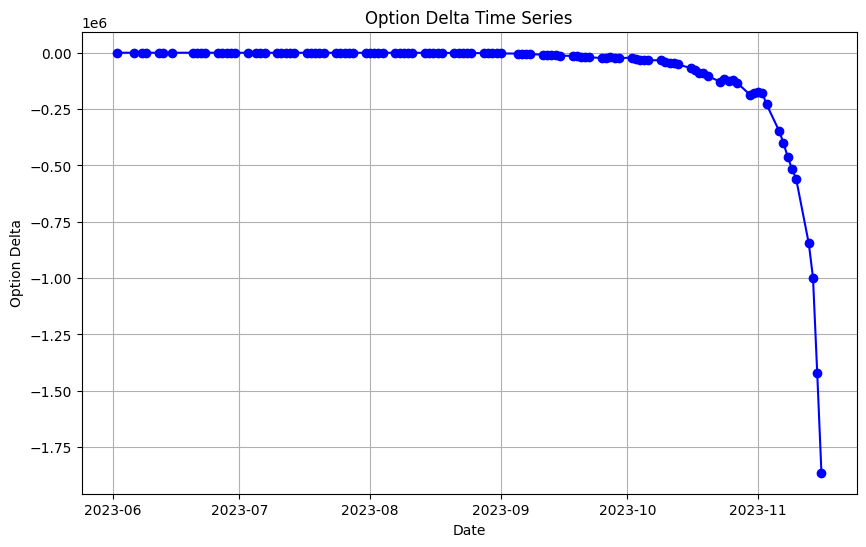

In [79]:
df['Time_to_Expiration'] = (pd.to_datetime('2023-11-17') - df['Date']).dt.days / 365

df['d1'] = (np.log(df['SPY US Equity'] / 455) + (df['6M SOFR'] - 0.0 + (df['Implied Vol']**2) / 2) * df['Time_to_Expiration']) / (df['Implied Vol'] * np.sqrt(df['Time_to_Expiration']))
df['d2'] = df['d1'] - df['Implied Vol'] * np.sqrt(df['Time_to_Expiration'])


df['Theta'] = (-df['SPY US Equity'] * np.exp(-0.0 * df['Time_to_Expiration']) * norm.pdf(df['d1']) * df['Implied Vol'] / (2 * np.sqrt(df['Time_to_Expiration'])) - \
              455 * np.exp(-df['6M SOFR'] * df['Time_to_Expiration']) * norm.pdf(df['d2']) * df['6M SOFR'])*100

print(df[['Date', 'Theta']].tail(30))

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Theta'], marker='o', linestyle='-', color='b')
plt.title('Option Delta Time Series')
plt.xlabel('Date')
plt.ylabel('Option Delta')
plt.grid(True)
plt.show()


# Calculate Delta Hedging PnL

In [70]:
import pandas as pd

df['P&L Unhedged'] = 0.0
df['P&L Hedged'] = 0.0

for i in range(1, len(df)):
    # Calculate change in S and C
    delta_s = df.loc[i, 'SPY US Equity'] - df.loc[i - 1, 'SPY US Equity']
    delta_c = df.loc[i, 'SPY US 11/17/23 P455 Equity'] - df.loc[i - 1, 'SPY US 11/17/23 P455 Equity']

    pnl_unhedged = -delta_c

    pnl_hedged = -delta_c + df.loc[i - 1, 'Option Delta'] * delta_s

    df.at[i, 'P&L Unhedged'] = pnl_unhedged
    df.at[i, 'P&L Hedged'] = pnl_hedged

print(df)
df.to_csv("pnl_results.csv")


          Date  SPY US 11/17/23 P455 Equity  SPY US Equity  6M SOFR  \
0          NaT                        36.51         421.82  5.28528   
1   2023-06-02                        29.48         427.92  5.24547   
2   2023-06-06                        29.23         427.10  5.28773   
3   2023-06-08                        27.80         428.03  5.27695   
4   2023-06-09                        26.96         426.55  5.27788   
..         ...                          ...            ...      ...   
114 2023-11-17                         4.47         440.19  5.43478   
115        NaT                          NaN         448.73  5.38077   
116        NaT                          NaN         449.68  5.37501   
117        NaT                          NaN         450.23  5.36347   
118        NaT                          NaN         450.79  5.35821   

     Implied Vol  Option Delta  Option Gamma  Time_to_Expiration         d1  \
0         12.576           NaN           NaN                 NaN    

/var/folders/5r/w2ryvdmn5v38q708l3f87k840000gn/T/ipykernel_4489/1027099686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P&L Unhedged'] = 0.0


In [71]:
df[['Date','SPY US 11/17/23 P455 Equity','SPY US Equity','P&L Unhedged','P&L Hedged']].head(20)

,Date,SPY US 11/17/23 P455 Equity,SPY US Equity,P&L Unhedged,P&L Hedged
0,NaT,36.51,421.82,0.00,0.000000
1,2023-06-02,29.48,427.92,7.03,NaN
2,2023-06-06,29.23,427.10,0.25,-0.034435
3,2023-06-08,27.80,428.03,1.43,1.740530
4,2023-06-09,26.96,426.55,0.84,0.343395
5,2023-06-12,24.73,429.13,2.23,3.042634
6,2023-06-13,22.60,429.90,2.13,2.389123
7,2023-06-15,19.35,433.80,3.25,4.602220
8,2023-06-20,21.50,436.66,-2.15,-1.033079
9,2023-06-21,21.89,437.18,-0.39,-0.171550


In [78]:
df[['Date','SPY US 11/17/23 P455 Equity','SPY US Equity','P&L Unhedged','P&L Hedged']].tail(20)

,Date,SPY US 11/17/23 P455 Equity,SPY US Equity,P&L Unhedged,P&L Hedged
99,2023-10-27,45.58,420.46,-6.39,-6.400751
100,2023-10-30,38.63,423.63,6.95,6.983303
101,2023-10-31,37.14,417.55,1.49,1.432936
102,2023-11-01,32.47,412.55,4.67,4.652034
103,2023-11-02,24.42,410.68,8.05,8.046674
104,2023-11-03,20.49,415.59,3.93,3.936256
105,2023-11-06,19.60,418.20,0.89,0.893863
106,2023-11-07,17.53,422.66,2.07,2.071808
107,2023-11-08,18.07,430.76,-0.54,-0.534478
108,2023-11-09,21.45,434.69,-3.38,-3.370507


In [72]:
print(df['P&L Hedged'].describe())
print()
print(df['P&L Unhedged'].describe())

count    114.000000
mean       0.197009
std        3.090369
min       -9.711330
25%       -1.341924
50%        0.241719
75%        2.002660
max        8.510082
Name: P&L Hedged, dtype: float64

count    115.000000
mean       0.278609
std        2.852534
min       -6.390000
25%       -1.145000
50%        0.150000
75%        1.750000
max        8.510000
Name: P&L Unhedged, dtype: float64


# Graph delta as a time series

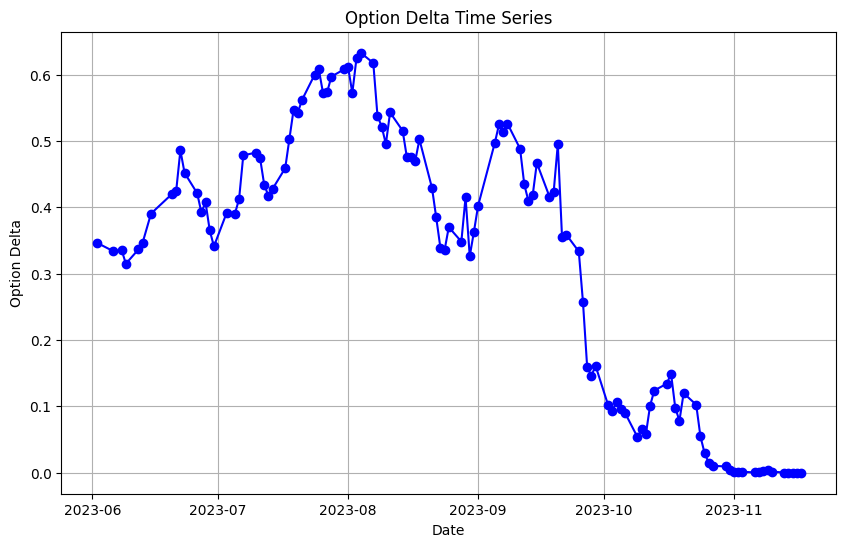

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Option Delta'], marker='o', linestyle='-', color='b')
plt.title('Option Delta Time Series')
plt.xlabel('Date')
plt.ylabel('Option Delta')
plt.grid(True)
plt.show()


# Graph gamma as a time series

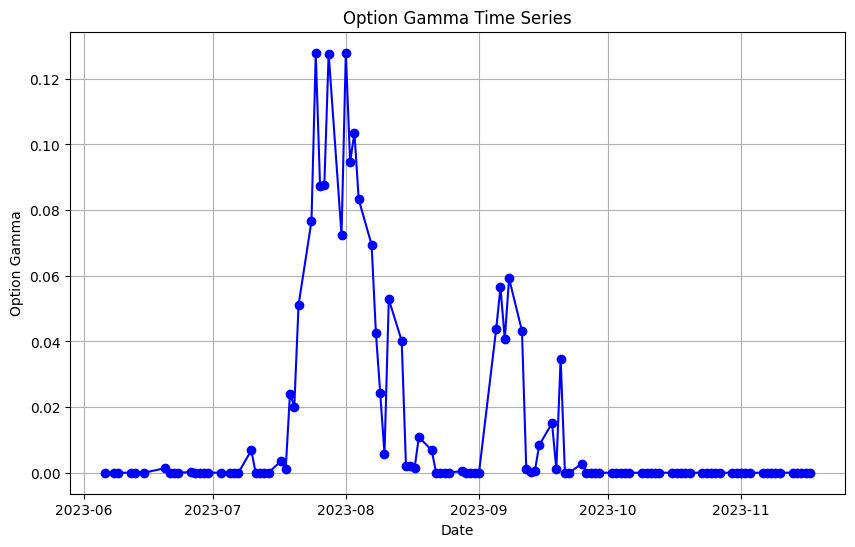

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Option Gamma'], marker='o', linestyle='-', color='b')
plt.title('Option Gamma Time Series')
plt.xlabel('Date')
plt.ylabel('Option Gamma')
plt.grid(True)
plt.show()

# Graph of stock price

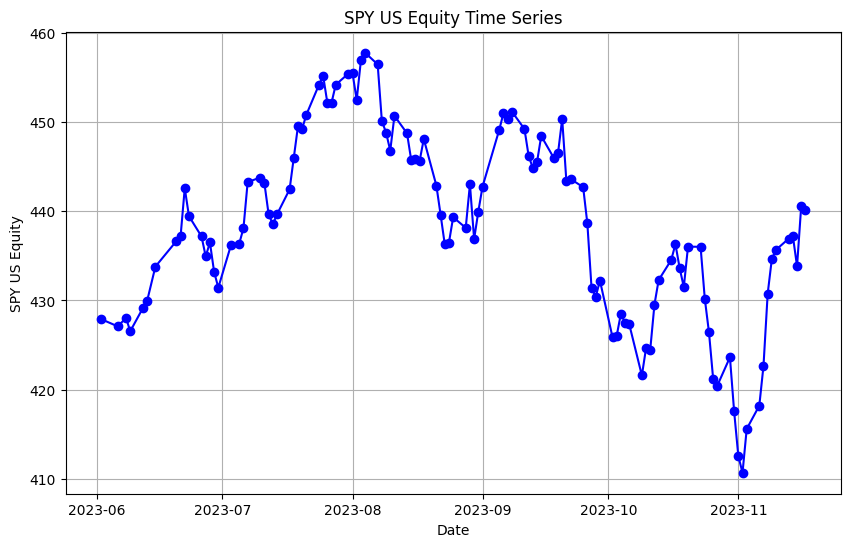

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SPY US Equity'], marker='o', linestyle='-', color='b')
plt.title('SPY US Equity Time Series')
plt.xlabel('Date')
plt.ylabel('SPY US Equity')
plt.grid(True)
plt.show()

# Plot log returns of SPY

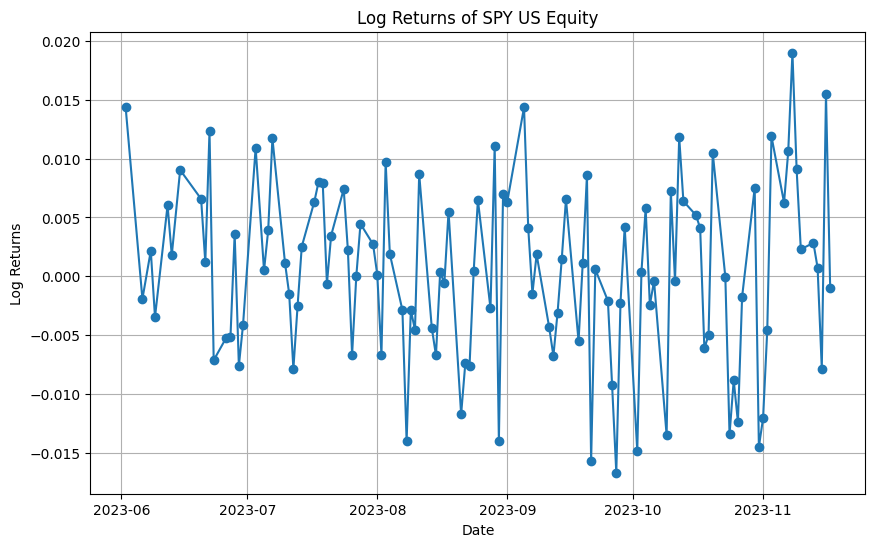

In [76]:
df['Date'] = pd.to_datetime(df['Date'])

df['Log Returns'] = np.log(df['SPY US Equity'] / df['SPY US Equity'].shift(1))

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Log Returns'], marker='o', linestyle='-')
plt.title('Log Returns of SPY US Equity')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid(True)
plt.show()

# Plot 6m SOFR rate

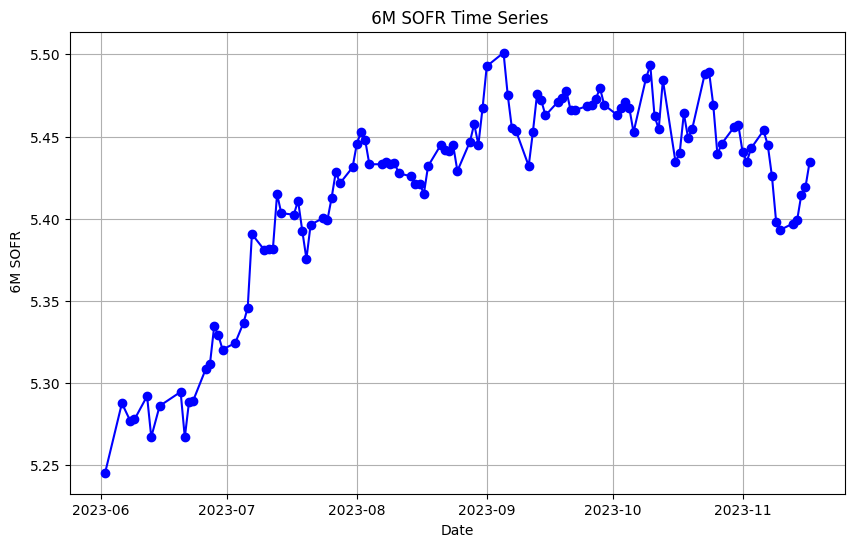

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])  

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['6M SOFR'], marker='o', linestyle='-', color='b')
plt.title(' 6M SOFR Time Series')
plt.xlabel('Date')
plt.ylabel(' 6M SOFR')
plt.grid(True)
plt.show()